In [1]:
import scipy.special as sp
import numpy as np
import uproot
import csv
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal

import Utilities.Constants as Constants
import Utilities.Functions as Functions
from Utilities.ipython_exit import exit

print("Success")

Success


## Equation to replicate
The first attempt comes from an equation in the HNL to e+e- recast of HPS decays in MicroBooNE paper: https://arxiv.org/abs/2106.06548

This has an equation for Majorana HNLs with the HNL mass << muon mass.

There are also equations from https://arxiv.org/pdf/0901.3589.pdf on pages 48/49

In [ ]:
#Constants
s_W_squared = 0.231 #sin squared Weinberg, Taken from Wikipedia, rough
G_F = 1.1663787e-5 #GeV-2 Fermi couplingconst, Taken from Jinst

N_mass = 0.1 #100 MeV
U_mu4 = 1e-4
Decay_width_2lep = (2*(G_F**2)*(U_mu4**2)*(N_mass**5)/(768*np.pi**3))*(1-4*s_W_squared+8*s_W_squared**2)

Decay_width_3nu = G_F**2/(96*np.pi**3)*(U_mu4**2)*(N_mass**5) #comes from "The search for heavy majorana neutrinos"



In [81]:
def get_kallen(x,y,z):
    kallen = (x-y-z)**2 - 4*y*z
    return kallen

def get_K_factor(U_mu, m_N):
    eps_N_squared = (m_N/m_K)**2
    eps_mu_squared = (m_mu/m_K)**2
    K_factor = U_mu**2*np.sqrt(get_kallen(1,eps_N_squared,eps_mu_squared))*(eps_mu_squared+eps_N_squared-(eps_N_squared-eps_mu_squared)**2)/(eps_mu_squared*(1-eps_mu_squared)**2)
    return K_factor

# def I_1(x,y,z):
#     factor = 12
#     inside = (s-x-y)*(1+z-s)*get
    

def get_nu_e_e_DW(U_mu, m_N):
    factor = ((G_F**2)*(U_mu**2)*(m_N**5)/(96*np.pi**3))
    inside_1 = g_L*g_R+delta_alpha_g_R*I_1(0,eps_e_squared,eps_e_squared)
    inside_2 = (g_L**2+g_R**2+delta_alpha_1_plus_2_g_L)*I_1(0,eps_e_squared,eps_e_squared)


In [82]:
U_mu = 1e-4
my_K_fac = {}
for mass in K_factors_pawel:
    calc = get_K_factor(U_mu, mass)
    Pawels = K_factors_pawel[mass]
    my_K_fac[mass] = calc
    # print("ours: " + str(calc))
    # print("Pawels: " + str(Pawels))
    ratio = calc/Pawels
    print(ratio)

16.897227280419735
4.860927755741805
2.1039518405946627
1.5290529484907427
1.374023746895113
1.30062035877489
1.2408491907270423
1.1897296239756177
1.1779001258718267


## Number of HNL decays pie chart

Total BNB is 40.62
Total NuMI is 1624.8
Fraction NuMI absorber 0.7568931560807484
Fraction NuMI target 0.2371774087017089


Do you want to save the plot? y/n y


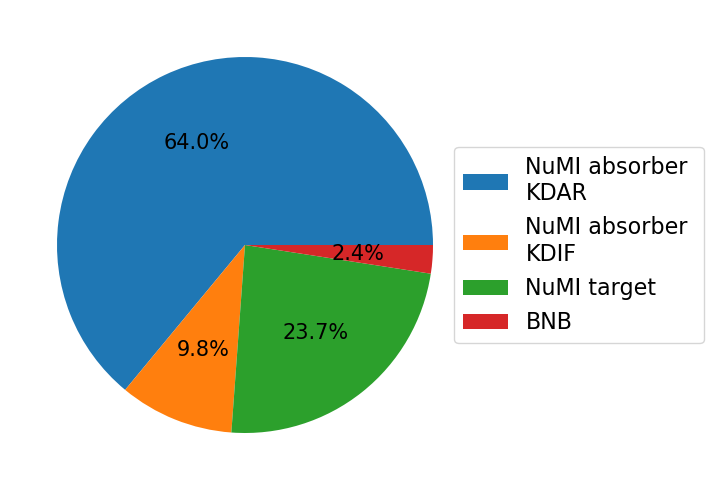

In [37]:
NuMI_abs = 143*8.6
NuMI_abs_KDAR = (0.65/0.75)*NuMI_abs
NuMI_abs_KDIF = NuMI_abs-NuMI_abs_KDAR
NuMI_target = 538-143
Total_NuMI = NuMI_abs + NuMI_target

Total_BNB = Total_NuMI/40
Total_HNL = Total_NuMI+Total_BNB

frac_NuMI_abs_KDAR = NuMI_abs_KDAR/Total_HNL
frac_NuMI_abs_KDIF = NuMI_abs_KDIF/Total_HNL
frac_NuMI_target = NuMI_target/Total_HNL
frac_BNB = Total_BNB/Total_HNL

print(f"Total BNB is {Total_BNB}")
print(f"Total NuMI is {Total_NuMI}")

print(f"Fraction NuMI absorber {frac_NuMI_abs}")
print(f"Fraction NuMI target {frac_NuMI_target}")

Fracs = [frac_NuMI_abs_KDAR, frac_NuMI_abs_KDIF, frac_NuMI_target, frac_BNB]
labels = ["NuMI absorber \nKDAR", "NuMI absorber \nKDIF", "NuMI target", "BNB"]

fig, ax = plt.subplots(figsize=(9, 5), subplot_kw=dict(aspect="equal"))

# plt.figure(figsize=(10,6))

# plt.pie(Fracs, labels=labels, autopct='%1.1f%%', textprops=dict(fontsize=16))

ax.pie(Fracs, autopct='%1.1f%%', textprops=dict(fontsize=15))
ax.legend(labels=labels, loc="center right", fontsize=16, bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()

# plt.show()

savefig = input("Do you want to save the plot? y/n")

if savefig =="y":
    plt.savefig("plots/Truth_studies/proportions_HNLs/HNL_source_proportions.pdf")
    plt.savefig("plots/Truth_studies/proportions_HNLs/HNL_source_proportions.png")
    

## Back of envelope rate

Now we have cross-checked the decay widths with the Genie generator, I am doing a rough calculation of the rate with these as input. 

All I need is the Number of KDAR per POT, the BR of K to nu,mu, partial and total decay widths, size of uboone, distance to it and the  average crossing distance of the fiducial volume.

In [83]:
ee_decay_widths = {0.002:4.9194e-37,0.010:5.45752e-33,0.020:1.81484e-31,0.050:1.79168e-29,0.100:5.74234e-28,
                   0.150:4.36185e-27,0.180:1.08544e-26,0.200:1.83827e-26,0.220:2.96061e-26,
                   0.240:4.57437e-26,0.245:5.07116e-26} #In GeV
# pi0_decay_widths = {150:,180:,200:,220:,240:,245:}
total_decay_widths = {0.002:1.51174e-35,0.010:5.1162e-32,0.020:1.64403e-30,0.050:1.60743e-28,0.100:5.14468e-27,
                      0.150:9.55714e-26,0.180:6.14694e-25,0.200:1.26835e-24,0.220:2.20297e-24,
                      0.240:3.45669e-24,0.245:3.82538e-24} #In GeV

tot_lifetime_ns = {0.002:4.35401e+19,0.010:1.28653e+16,0.020:4.00366e+14,0.050:4.09481e+12,0.100:1.2794e+11,
                      0.150:6.88712e+09,0.180:1.0708e+09,0.200:5.18949e+08,0.220:2.98784e+08,
                      0.240:1.90417e+08,0.245:1.72065e+08}

K_factors_pawel = {0.02:6.14857e-10,0.05:2.54853e-09,0.1:8.99069e-09,0.15:1.81569e-08,0.18:2.40696e-08,
                         0.2:2.78275e-08, 0.22:3.12136e-08, 0.24:3.40214e-08, 0.245:3.46077e-08} #from generator

new_files_evs_per_POT = {0.02:6.194810991737083e-30,0.05:1.9482899142455826e-27,0.1:1.931721768786512e-25,0.15:3.5352320211547e-24,0.18:1.3477768158032065e-23,
                         0.2:2.997194422172775e-23, 0.22:6.166317118956644e-23, 0.24:1.198588183749937e-22, 0.245:1.390099886466228e-22} #ee only

scaled_evs_per_POT = {}
for mass in new_files_evs_per_POT:
    scaled_evs_per_POT[mass] = new_files_evs_per_POT[mass]*8.0

KDAR_per_POT = 0.085 #This actually includes the BR, since it is KDAR to numu
distance_to_uboone = 102 #in m, taken from Owen's thesis
KDAR_numu_BR = 0.6356
m_K = 0.4937 #GeV
m_mu = 0.1057 #GeV
m_e = 0.51e-3 #GeV
hbar = 6.5821310774e-16 #in eV s 
c = 2.998e8 # in m per s
Total_POT = 7e20 #r1 plus r3 POT

#TPC in m
TPCx=[0,2.56]
TPCy=[-1.15,1.17]
TPCz=[0,10.37]

Orientation = 1 #Either 1 or 2
print("Using orientation " + str(Orientation))

if Orientation == 1:
    av_distance = TPCy[1]-TPCy[0] #m, roughly assumes HNL coming from the bottom (y-direction)
    d1 = TPCx[1]-TPCx[0]
    d2 = TPCz[1]-TPCz[0]
if Orientation == 2:
    av_distance = TPCz[1]-TPCz[0] #m, roughly assumes HNL coming from the back (z-direction)
    d1 = TPCx[1]-TPCx[0]
    d2 = TPCy[1]-TPCy[0]
    
print("Average crossing distance is " + str(av_distance))
print("Dimensions are " + str(d1) + " by " +str(d2))

Using orientation 1
Average crossing distance is 2.32
Dimensions are 2.56 by 10.37


In [84]:
def Convert_GeV_to_eV(dw_dict):
    converted = {}
    for mass in dw_dict:
        converted[mass] = dw_dict[mass]*1e9
    return converted

def Convert_ns_to_s(lifetime_dict):
    converted = {}
    for mass in lifetime_dict:
        converted[mass] = lifetime_dict[mass]/(1e9)
    return converted

def get_solid_angle(x,y,distance): #assumes small angle (good assumption)
    solid_angle = x*y/(4*np.pi*distance**2)
    return solid_angle

def get_gamma_beta_factors(HNL_mass): #Assuming kaon decay to N and mu
    E_HNL = (m_K**2+HNL_mass**2-m_mu**2)/(2*m_K)
    gamma = E_HNL/HNL_mass
    beta = np.sqrt(1-1/gamma**2)
    return gamma, beta

def get_decay_length(lifetime_total, gamma, beta):
    decay_length = gamma*beta*c*lifetime_total
    return decay_length

def decay_prob_before_uboone(dw_total, d_uboone, gamma, beta):
    decay_prob = 1-np.exp(-d_uboone/(gamma*beta*c*(hbar/dw_total)))
    return decay_prob

def get_av_decay_prob(dw_total, d_initial, d_final, gamma, beta): #WRONG FOR HNL, since lifetime is so long
    norm_factor = 1/(gamma*beta*c*(hbar/dw_total))
    decay_prob = np.exp(-d_initial/(gamma*beta*c*(hbar/dw_total))) - np.exp(-d_final/(gamma*beta*c*(hbar/dw_total)))
    return norm_factor*decay_prob

def get_HNL_decay_prob(d_difference, decay_length): #Assuming none decay before
    decay_prob = 1-np.exp(-d_difference/decay_length)
    return decay_prob

def get_unnormed_decay_prob(d_initial, d_final, decay_length):
    decay_prob = np.exp(-1*d_initial/decay_length) - np.exp(-1*d_final/decay_length)
    return decay_prob

def get_decay_prob_in_uboone(d_initial, d_final, decay_length):
    norm_factor = 1/decay_length
    decay_prob = np.exp(-1*d_initial/decay_length) - np.exp(-1*d_final/decay_length)
    return norm_factor*decay_prob


In [85]:
gammas, betas, decay_probs, decay_length_dict, decay_prob_before_uboone_dict, channel_BRs = {}, {}, {}, {}, {}, {}
Num_decays_per_POT_dict, Total_decays_dict, ratios = {}, {}, {}

ee_dw_eV = Convert_GeV_to_eV(ee_decay_widths)
total_dw_eV = Convert_GeV_to_eV(total_decay_widths)

lifetimes_s = Convert_ns_to_s(tot_lifetime_ns)

print("solid angle is")
solid_angle = get_solid_angle(d1,d2,distance_to_uboone)
print(solid_angle)
print()


solid angle is
0.00020305258099044426



In [86]:
for HNL_mass in new_files_evs_per_POT.keys():
    MeV_mass = HNL_mass*1000
    print(str(int(MeV_mass))+"MeV")
    
    gamma, beta = get_gamma_beta_factors(HNL_mass) #unitless
    decay_length = get_decay_length(lifetimes_s[HNL_mass], gamma, beta) #gamma*beta*c*lifetime
    # decay_prob = get_decay_prob_in_uboone(distance_to_uboone, distance_to_uboone+av_distance, decay_length)
    # decay_prob = get_HNL_decay_prob(av_distance, decay_length)
    decay_prob = get_unnormed_decay_prob(distance_to_uboone, distance_to_uboone+av_distance, decay_length)
    decay_prob_before_uboone_dict[HNL_mass] = decay_prob_before_uboone(total_dw_eV[HNL_mass], distance_to_uboone, gamma, beta)
    channel_BR = ee_dw_eV[HNL_mass]/total_dw_eV[HNL_mass]
    
    # Num_decays_per_POT = KDAR_per_POT*(1/KDAR_numu_BR)*K_factors_pawel[HNL_mass]*solid_angle*decay_prob*channel_BR #Pawel's BR output
    Num_decays_per_POT = KDAR_per_POT*my_K_fac[HNL_mass]*solid_angle*decay_prob*channel_BR
    # Num_decays_per_POT = KDAR_per_POT*(1/KDAR_numu_BR)*my_K_fac[HNL_mass]*solid_angle*decay_prob*channel_BR
    Total_decays = Num_decays_per_POT*Total_POT
    
    gammas[HNL_mass], betas[HNL_mass] = gamma, beta
    decay_length_dict[HNL_mass] = decay_length
    decay_probs[HNL_mass] = decay_prob
    channel_BRs[HNL_mass] = channel_BR
    Num_decays_per_POT_dict[HNL_mass] = Num_decays_per_POT
    Total_decays_dict[HNL_mass] = Total_decays

    ratio = scaled_evs_per_POT[HNL_mass]/Num_decays_per_POT_dict[HNL_mass]
    ratios[HNL_mass] = ratio
    
    print(ratio)

20MeV
1.5033875400450203
50MeV
1.6108075115001632
100MeV
1.5732502084265665
150MeV
1.6137021342458455
180MeV
1.636655693069163
200MeV
1.689591571349237
220MeV
1.7391689848215077
240MeV
1.8033977875890508
245MeV
1.803697542224057


In [70]:
print(1/KDAR_numu_BR)

print(1/1.6)

1.5733165512901195
0.625


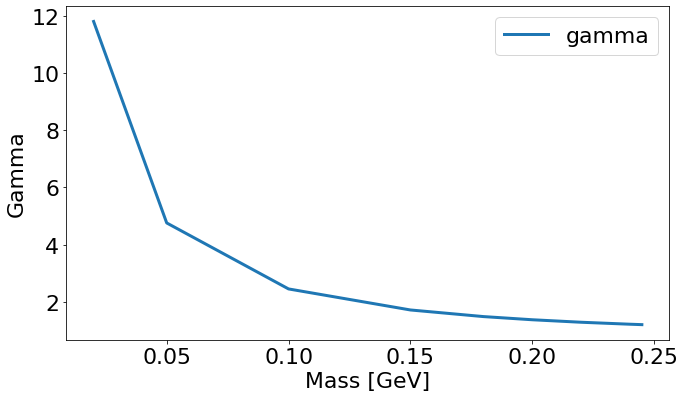

In [79]:
savefigs = True

plt.rc('font', size=22)
plt.figure(figsize=(10,6))
plt.plot(gammas.keys(),gammas.values(), lw=3, label="gamma")

plt.xlabel("Mass [GeV]")
plt.ylabel("Gamma")
plt.legend()

plt.tight_layout()

if savefigs == True:
    plt.savefig("plots/Generator/cross_check/Gamma_factors.png")
    plt.savefig("plots/Generator/cross_check/Gamma_factors.pdf")

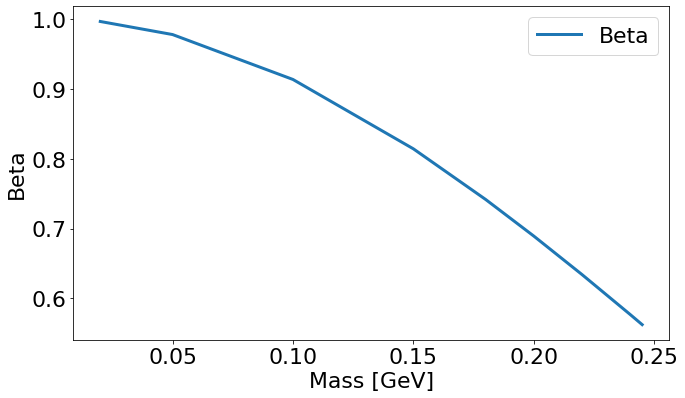

In [31]:
plt.figure(figsize=(10,6))
plt.plot(betas.keys(),betas.values(), lw=3, label="Beta")

plt.xlabel("Mass [GeV]")
plt.ylabel("Beta")
plt.legend()

plt.tight_layout()

if savefigs == True:
    plt.savefig("plots/Generator/cross_check/Betas.png")
    plt.savefig("plots/Generator/cross_check/Betas.pdf")

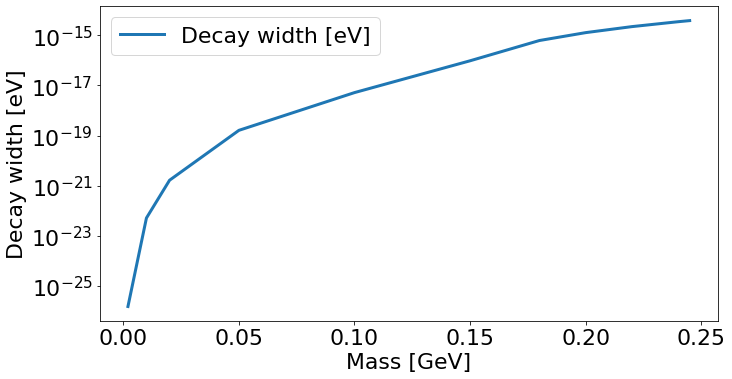

In [32]:
plt.figure(figsize=(10,6))
plt.plot(total_dw_eV.keys(),total_dw_eV.values(), lw=3, label="Decay width [eV]")

plt.xlabel("Mass [GeV]")
plt.ylabel("Decay width [eV]")
plt.legend()

plt.tight_layout()

plt.yscale("log")

if savefigs == True:
    plt.savefig("plots/Generator/cross_check/Decay_widths.png")
    plt.savefig("plots/Generator/cross_check/Decay_widths.pdf")

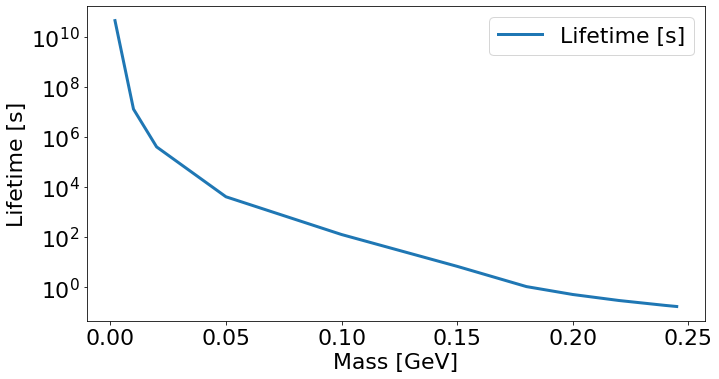

In [33]:
plt.figure(figsize=(10,6))
plt.plot(lifetimes_s.keys(),lifetimes_s.values(), lw=3, label="Lifetime [s]")

plt.xlabel("Mass [GeV]")
plt.ylabel("Lifetime [s]")
plt.legend()

plt.tight_layout()

plt.yscale("log")

if savefigs == True:
    plt.savefig("plots/Generator/cross_check/Lifetimes.png")
    plt.savefig("plots/Generator/cross_check/Lifetimes.pdf")

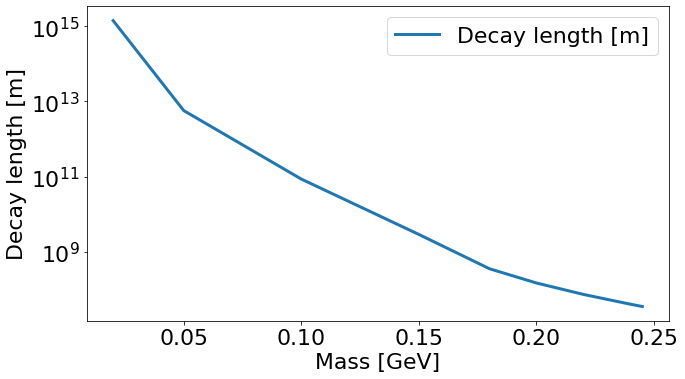

In [34]:
plt.figure(figsize=(10,6))
plt.plot(decay_length_dict.keys(),decay_length_dict.values(), lw=3, label="Decay length [m]")

plt.xlabel("Mass [GeV]")
plt.ylabel("Decay length [m]")
plt.legend()

plt.tight_layout()

plt.yscale("log")

if savefigs == True:
    plt.savefig("plots/Generator/cross_check/Decay_length.png")
    plt.savefig("plots/Generator/cross_check/Decay_length.pdf")

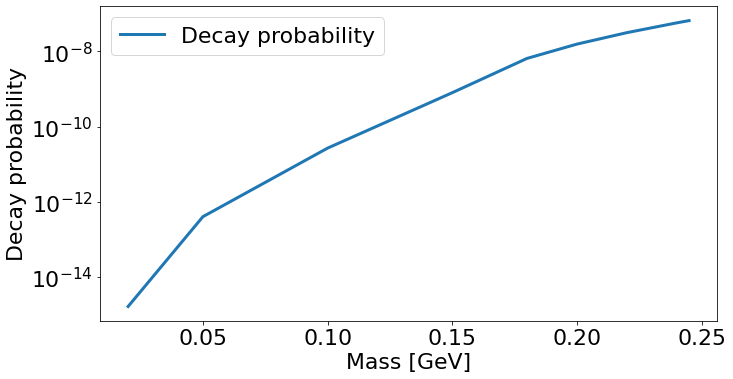

In [35]:
plt.figure(figsize=(10,6))
plt.plot(decay_probs.keys(),decay_probs.values(), lw=3, label="Decay probability")

plt.xlabel("Mass [GeV]")
plt.ylabel("Decay probability")
plt.legend()

plt.tight_layout()

plt.yscale("log")

if savefigs == True:
    plt.savefig("plots/Generator/cross_check/Decay_prob.png")
    plt.savefig("plots/Generator/cross_check/Decay_prob.pdf")

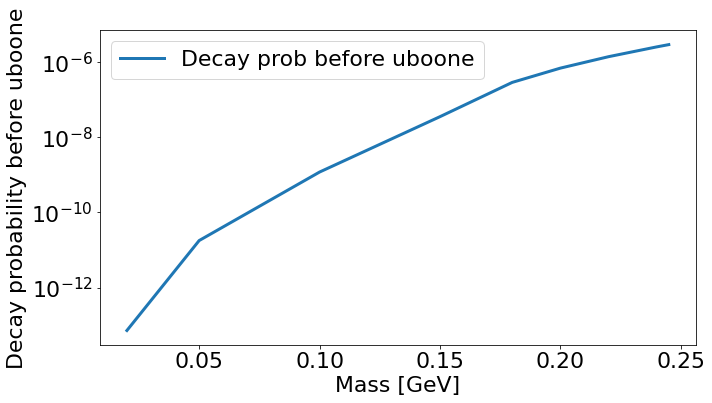

In [36]:

plt.figure(figsize=(10,6))
plt.plot(decay_prob_before_uboone_dict.keys(),decay_prob_before_uboone_dict.values(), lw=3, label="Decay prob before uboone")

plt.xlabel("Mass [GeV]")
plt.ylabel("Decay probability before uboone")
plt.legend()

plt.tight_layout()

plt.yscale("log")

if savefigs == True:
    plt.savefig("plots/Generator/cross_check/Decay_prob_before_uboone.png")
    plt.savefig("plots/Generator/cross_check/Decay_prob_before_uboone.pdf")

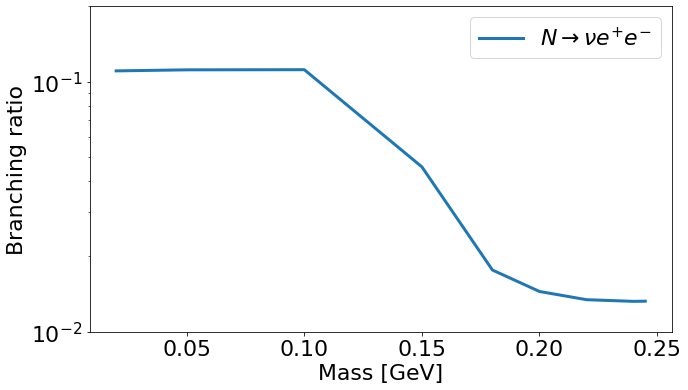

In [37]:

plt.figure(figsize=(10,6))
plt.plot(channel_BRs.keys(),channel_BRs.values(), lw=3, label=r"$N \rightarrow \nu e^{+}e^{-}$")

plt.xlabel("Mass [GeV]")
plt.ylabel("Branching ratio")
plt.legend()

plt.ylim(1e-2, 0.2)

plt.tight_layout()

plt.yscale("log")

if savefigs == True:
    plt.savefig("plots/Generator/cross_check/Branching_ratio.png")
    plt.savefig("plots/Generator/cross_check/Branching_ratio.pdf")

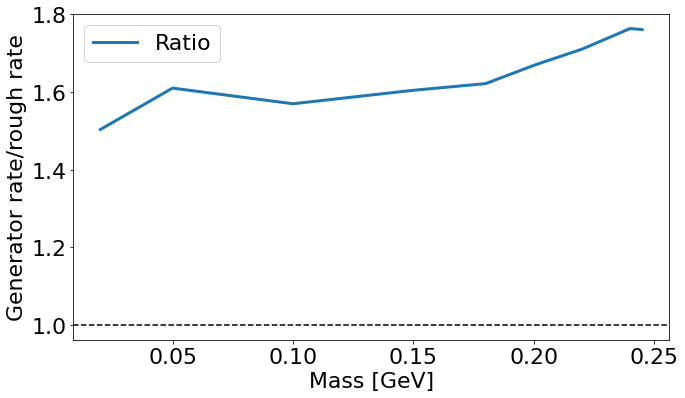

In [80]:
plt.figure(figsize=(10,6))
plt.plot(ratios.keys(),ratios.values(), lw=3, label="Ratio")

plt.axhline(1.0, color="black", linestyle="dashed")

plt.xlabel("Mass [GeV]")
plt.ylabel("Generator rate/rough rate")
plt.legend()

# plt.yscale("log")

plt.tight_layout()

if savefigs == True:
    plt.savefig("plots/Generator/cross_check/Ratio_evs_per_POT_HNL_NEW.png")
    plt.savefig("plots/Generator/cross_check/Ratio_evs_per_POT_HNL_NEW.pdf")

In [ ]:
#Testing Pawel's equation
decay_length_Pawel = 86283 # m 

Decay_prob_pawel = get_decay_prob_in_uboone(distance_to_uboone, distance_to_uboone+av_distance, decay_length_Pawel)
unnormed_decay_prob_pawel = get_unnormed_decay_prob(distance_to_uboone, distance_to_uboone+av_distance, decay_length_Pawel)

print(Decay_prob_pawel)
print(unnormed_decay_prob_pawel)

total_num_Pawel = (KDAR_per_POT/0.6356)*2e-4*unnormed_decay_prob_pawel*3.4e-10*1e20

print(total_num_Pawel)

In [ ]:
ratio_over_lifetime = {}

for HNL_mass in ratios.keys():
    ratio_over_lifetime[HNL_mass] = ratios[HNL_mass]/lifetimes_s[HNL_mass]
    print(ratio_over_lifetime[HNL_mass])

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(ratio_over_lifetime.keys(),ratio_over_lifetime.values(), lw=3, label="Ratio")

plt.axhline(1.0, color="black", linestyle="dashed")

plt.xlabel("Mass [GeV]")
plt.ylabel("Generator rate/rough rate")
plt.legend()

# plt.yscale("log")

plt.tight_layout()

In [ ]:
HNL_mass = 0.1
print(lifetimes_s)

ratio_dw_lifetime = total_dw_eV[HNL_mass]/lifetimes_s[HNL_mass]

print(total_decay_widths[HNL_mass]*1e9/(tot_lifetime_ns[HNL_mass]/1e9))

print(hbar/ratio_dw_lifetime)

In [ ]:
for HNL_mass in total_dw_eV.keys():
    print(HNL_mass)
    gamma, beta = get_gamma_beta_factors(HNL_mass) #unitless
    # decay_prob = get_av_decay_prob(total_dw_eV[HNL_mass], distance_to_uboone, distance_to_uboone+av_distance, gamma, beta)
    decay_prob = get_av_decay_prob_c2(total_dw_eV[HNL_mass], distance_to_uboone, distance_to_uboone+av_distance, gamma, beta)
    channel_BR = ee_dw_eV[HNL_mass]/total_dw_eV[HNL_mass]
    
    Num_decays_per_POT = Decimal(KDAR_per_POT)*Decimal(solid_angle)*decay_prob*Decimal(channel_BR)
    Total_decays = Num_decays_per_POT*Decimal(Total_POT)
    
    Num_decays_per_POT_dict[HNL_mass] = Num_decays_per_POT
    Total_decays_dict[HNL_mass] = Total_decays
    
    print(Num_decays_per_POT)

In [ ]:
gamma = 2.4566254810613732
beta = 0.9134003270797837

test_dec_prob = np.exp(-100/(gamma*beta*c*(1.3e-4))) - np.exp(-102.5/(gamma*beta*c*(1.3e-4)))
print(test_dec_prob)

## Genie HNL generator comparison

In [2]:
def get_interpolated_vals(x, y, x_vals_wanted):
    y_interp = np.interp(x_vals_wanted, x, y)

    return y_interp

def get_ratio(arr1,arr2):
    ratio = np.divide(np.array(arr1), np.array(arr2))
    return ratio

## Reading in .log files

In [ ]:
filename = "Branching_ratios/new_fixed_factor_feb14/SCAN_again.log"

with open(filename) as f:
    lines = f.readlines()

nu_channel_majorana, nu_channel_dirac = [], []
eplus_eminus_channel, eplus_eminus_channel_dirac = [], []
e_mu_channel_majorana, e_mu_channel_dirac = [], []
pi0_channel, pi0_channel_dirac = [], []
e_pi_channel_majorana, e_pi_channel_dirac = [], []
mu_mu_channel_majorana, mu_mu_channel_dirac = [], []
mu_pi_channel_majorana, mu_pi_channel_dirac = [], []

lifetime_majorana, lifetime_dirac = [], []

counter = 0
mass_start_point = 0.001 #GeV
mass_list = []
for line in lines:
    if ("Channel 0" in line) and ((counter+23) % 32 == 0): #3nu
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        nu_channel_majorana.append(width_value)
        mass = mass_start_point*len(nu_channel_majorana)
        mass_list.append(mass)
    if ("Channel 1" in line) and ((counter+22) % 32 == 0): #nuee
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        eplus_eminus_channel.append(width_value)
    if ("Channel 2" in line) and ((counter+21) % 32 == 0): #numue
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        e_mu_channel_majorana.append(br_value)
    if ("Channel 3" in line) and ((counter+20) % 32 == 0): #nupi0
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        pi0_channel.append(width_value)
    if ("Channel 4" in line) and ((counter+19) % 32 == 0): #epi
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        e_pi_channel_majorana.append(width_value)
    if ("Channel 5" in line) and ((counter+18) % 32 == 0): #numumu
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        mu_mu_channel_majorana.append(width_value)
    if ("Channel 6" in line) and ((counter+17) % 32 == 0): #mupi
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        mu_pi_channel_majorana.append(width_value)
    if ("lifetime" in line) and ((counter+24) % 32 == 0):
        lifetime_val = float(line.split(" ")[-1])
        lifetime_majorana.append(lifetime_val)
        
    if ("Channel 0" in line) and ((counter+31) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        nu_channel_dirac.append(width_value)
    if ("Channel 1" in line) and ((counter+30) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        eplus_eminus_channel_dirac.append(width_value) 
    if ("Channel 2" in line) and ((counter+29) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        e_mu_channel_dirac.append(width_value) 
    if ("Channel 3" in line) and ((counter+28) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        pi0_channel_dirac.append(width_value)
    if ("Channel 4" in line) and ((counter+27) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        e_pi_channel_dirac.append(width_value)
    if ("Channel 5" in line) and ((counter+26) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        mu_mu_channel_dirac.append(width_value)
    if ("Channel 6" in line) and ((counter+25) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        width_value = float(line.split(" ")[-3])
        mu_pi_channel_dirac.append(width_value)
    if ("lifetime" in line) and ((counter+32) % 32 == 0):
        lifetime_val = float(line.split(" ")[-1])
        lifetime_dirac.append(lifetime_val)
    counter += 1
    
print(counter)
print(len(mass_list))
print(len(lifetime_majorana))
print(len(lifetime_dirac))
BR_list_maj = [nu_channel_majorana, eplus_eminus_channel, e_mu_channel_majorana, pi0_channel, e_pi_channel_majorana,
               mu_mu_channel_majorana, mu_pi_channel_majorana]
BR_list_dir = [nu_channel_dirac, eplus_eminus_channel_dirac, e_mu_channel_dirac, pi0_channel_dirac, 
               e_pi_channel_dirac, mu_mu_channel_dirac, mu_pi_channel_dirac]

for l in BR_list_maj:
    print(len(l))
for m in BR_list_dir:
    print(len(m))

In [ ]:
print(type(np.array(mass_list)))
mass_for_df = np.array(mass_list)
lifetime_for_df = np.array(lifetime_dirac)
three_nu_for_df = np.array(nu_channel_dirac)
ee_for_df = np.array(eplus_eminus_channel_dirac)
e_mu_for_df = np.array(e_mu_channel_dirac)
pi0_for_df = np.array(pi0_channel_dirac)
e_pi_for_df = np.array(e_pi_channel_dirac)
mu_mu_for_df = np.array(mu_mu_channel_dirac)
mu_pi_for_df = np.array(mu_pi_channel_dirac)

dict_for_dirac = {"mass":mass_for_df, "lifetime":lifetime_for_df, "width_3nu":three_nu_for_df, "width_e+e-":ee_for_df, "width_nu_pi0":pi0_for_df,
                  "width_e_mu":e_mu_for_df,"width_e_pi":e_pi_for_df, "width_mu_mu":mu_mu_for_df, "width_mu_pi":mu_pi_for_df}

df_dirac = pd.DataFrame(dict_for_dirac)
df_dirac.to_csv("Branching_ratios/new_fixed_factor_feb14/Genie_Majorana_widths.csv")
df_dirac.head()

In [3]:
# filename = "Branching_ratios/new_fixed_factor_feb14/Pawel_dirac_mu.log"
Majorana = True
if Majorana == True: N_type = "major"
else: N_type = "dirac"
filename = f"Branching_ratios/new_negwt_fix_Mar13/negs_out_{N_type}_mu.log"
# filename = f"Branching_ratios/new_weinberg_fix_March6/durham_out_{N_type}_mu.log"
# filename = "Branching_ratios/new_weinberg_fix_March6/durham_out_dirac_mu.log"

with open(filename) as f:
    lines = f.readlines()

nu_channel = []
eplus_eminus_channel = []
e_mu_channel = []
pi0_channel = []
e_pi_channel = []
mu_mu_channel = []
mu_pi_channel = []
Tot_gamma = []

lifetime_majorana, lifetime_dirac = [], []

counter = 0
mass_start_point = 0.001 #GeV
mass_list = []

for line in lines:
    if ("N -> nu nu nu" in line): #3nu
        width_str = line.split(" ")[-2]
        # print(width_str)
        width_value = float(width_str.split("=")[-1])
        nu_channel.append(width_value)
        mass = mass_start_point*len(nu_channel)
        mass_list.append(mass)
    if (" N+ -> nu e- e+" in line): #nu e+e-
        width_str = line.split(" ")[-4]
        width_value = float(width_str.split("=")[-1])
        eplus_eminus_channel.append(width_value) #Pawel said not to multiply by 2
    if (" N+ -> nu pi0" in line): #nu pi0
        width_str = line.split(" ")[-2]
        width_value = float(width_str.split("=")[-1])
        pi0_channel.append(width_value)
    if ("N+ -> nu mu- e+" in line): #nu mu e
        width_str = line.split(" ")[-4]
        width_value = float(width_str.split("=")[-1])
        if Majorana == True: e_mu_channel.append(width_value*2) #Times 2 to account for the other flavour of nu: nu e- mu+ ONLY IN MAJORANA
        else: e_mu_channel.append(width_value) 
    if ("N+ -> nu mu- mu+" in line):
        width_str = line.split(" ")[-4]
        width_value = float(width_str.split("=")[-1])
        if Majorana == True: mu_mu_channel.append(width_value*2)
        else: e_mu_channel.append(width_value)
    if ("N -> pi mu" in line): 
        width_str = line.split(" ")[-2]
        width_value = float(width_str.split("=")[-1])
        if Majorana == True: mu_pi_channel.append(width_value*2) #Times 2 to account for conjugate in Majorana case
        else: mu_pi_channel.append(width_value)
    if ("N+ -> X" in line): 
        width_str = line.split(" ")[-3]
        width_value = float(width_str.split("=")[-1])
        Tot_gamma.append(width_value)  
    

print(len(mass_list))
print(len(nu_channel))
print(len(eplus_eminus_channel))
print(len(pi0_channel))
print(len(e_mu_channel))
print(len(mu_mu_channel))
print(len(Tot_gamma))

#Need to fill the start of the lists with zeros, where there are no entries
difference_eplus_eminus = len(nu_channel) - len(eplus_eminus_channel)
for i in range(0,difference_eplus_eminus):
    eplus_eminus_channel = [0] + eplus_eminus_channel
    
difference_pi0 = len(nu_channel) - len(pi0_channel)
for i in range(0,difference_pi0):
    pi0_channel = [0] + pi0_channel
    
difference_emu = len(nu_channel) - len(e_mu_channel)
for i in range(0,difference_emu):
    e_mu_channel = [0] + e_mu_channel
    
difference_mumu = len(nu_channel) - len(mu_mu_channel)
for i in range(0,difference_mumu):
    mu_mu_channel = [0] + mu_mu_channel
    
difference_mupi = len(nu_channel) - len(mu_pi_channel)
for i in range(0,difference_mupi):
    mu_pi_channel = [0] + mu_pi_channel

print()
print(len(mass_list))
print(len(nu_channel))
print(len(eplus_eminus_channel))
print(len(pi0_channel))
print(len(e_mu_channel))
print(len(mu_mu_channel))
print(len(mu_pi_channel))

388
388
387
254
282
177
388

388
388
388
388
388
388
388


In [4]:
#Make BRs
def Make_BRs(width_list, Totgamma_list):
    BR_list = []
    for i, width in enumerate(width_list):
        BR = width/Totgamma_list[i]
        BR_list.append(BR)
    return BR_list

nu_channel_BR = Make_BRs(nu_channel, Tot_gamma)
eplus_eminus_BR = Make_BRs(eplus_eminus_channel, Tot_gamma)
pi0_channel_BR = Make_BRs(pi0_channel, Tot_gamma)
e_mu_channel_BR = Make_BRs(e_mu_channel, Tot_gamma)
mu_mu_channel_BR = Make_BRs(mu_mu_channel, Tot_gamma)
mu_pi_channel_BR = Make_BRs(mu_pi_channel, Tot_gamma)

In [6]:
mass_for_df = np.array(mass_list)
three_nu_for_df = np.array(nu_channel)
ee_for_df = np.array(eplus_eminus_channel)
pi0_for_df = np.array(pi0_channel)
emu_for_df = np.array(e_mu_channel)
mumu_for_df = np.array(mu_mu_channel)
mu_pi_for_df = np.array(mu_pi_channel)

chans_df = [three_nu_for_df,ee_for_df, pi0_for_df, emu_for_df, mumu_for_df, mu_pi_for_df]

for chan in chans_df:
    if min(chan) >= 0: print("Fine")
    else: 
        print("negative decay widths")
        a = chan < 0
        b = np.count_nonzero(a)
        print(b)


Fine
Fine
Fine
Fine
Fine
Fine


In [7]:
dict_for_df = {"mass":mass_for_df, "width_3nu":three_nu_for_df, "width_e+e-":ee_for_df, "width_nu_pi0":pi0_for_df,
               "width_nu_e_mu":emu_for_df, "width_mu_mu":mumu_for_df, "width_mu_pi":mu_pi_channel, "width_total":Tot_gamma,
               "BR_3nu":np.array(nu_channel_BR), "BR_e+e-":np.array(eplus_eminus_BR), "BR_mu_mu":np.array(mu_mu_channel_BR),
               "BR_nu_pi0":np.array(pi0_channel_BR),
               "BR_nu_e_mu":np.array(e_mu_channel_BR), "BR_mu_pi":np.array(mu_pi_channel_BR)}

df_dirac = pd.DataFrame(dict_for_df)
df_dirac.to_csv("Branching_ratios/new_fixed_factor_feb14/Pawel_Majorana_negwt_fixed_13_Mar.csv")
df_dirac.head()

,mass,width_3nu,width_e+e-,width_nu_pi0,width_nu_e_mu,width_mu_mu,width_mu_pi,width_total,BR_3nu,BR_e+e-,BR_mu_mu,BR_nu_pi0,BR_nu_e_mu,BR_mu_pi
0,0.001,4.570440e-37,0.000000e+00,0.0,0.0,0.0,0.0,4.570440e-37,1.000000,0.000000,0.0,0.0,0.0,0.0
1,0.002,1.462540e-35,4.919400e-37,0.0,0.0,0.0,0.0,1.511740e-35,0.967455,0.032541,0.0,0.0,0.0,0.0
2,0.003,1.110620e-34,7.947520e-36,0.0,0.0,0.0,0.0,1.190090e-34,0.933224,0.066781,0.0,0.0,0.0,0.0
3,0.004,4.680130e-34,4.288900e-35,0.0,0.0,0.0,0.0,5.109020e-34,0.916052,0.083948,0.0,0.0,0.0,0.0
4,0.005,1.428260e-33,1.465770e-34,0.0,0.0,0.0,0.0,1.574840e-33,0.906924,0.093074,0.0,0.0,0.0,0.0


## Reading dataframes

In [2]:
cols = ['Mass','Value']
Davide_ee = pd.read_csv("Branching_ratios/Davide_ee_mu_like.csv",names=cols)
Davide_pi0 = pd.read_csv("Branching_ratios/Davide_pi0_mu_like.csv",names=cols)

cols_Pawel_new = ["mass", "lifetime [ns]", "BR 3nu", "BR epi", "BR mupi", "BR nupi0", "BR nue+e-", 
                  "BR e+mu-", "BR e-mu+", "BR mu+mu-"]
cols_Genie = ["mass", "lifetime",  "BR e+e-",  "BR nu pi0"]

Pawel_new_maj_mu = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/br_major_mu.txt",names=cols_Pawel_new, sep=" ")
Pawel_new_dir_mu = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/br_dirac_mu.txt",names=cols_Pawel_new, sep=" ")
Genie_new_maj_nu = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/Genie_Majorana_new.csv")
Genie_new_dir_nu = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/Genie_Dirac_new.csv")

# Pawel_new_maj_widths = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/Pawel_Majorana_widths.csv")
Genie_new_maj_widths = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/Genie_Majorana_widths.csv")
Genie_new_dir_widths = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/Genie_Dirac_widths.csv")

Pawel_new_maj_widths = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/Pawel_Majorana_negwt_fixed_13_Mar.csv")
Pawel_new_dir_widths = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/Pawel_Dirac_weinberg_fixed_8_Mar.csv")

# DUNE_ee = pd.read_csv("Branching_ratios/DUNE_ND_BR_ee.csv",names=cols)
# DUNE_3nu = pd.read_csv("Branching_ratios/DUNE_ND_BR_3nu.csv",names=cols)
# DUNE_nupi = pd.read_csv("Branching_ratios/DUNE_ND_BR_nupi.csv",names=cols)

## Plotting decay widths

Do you want to save the figure? y/n y


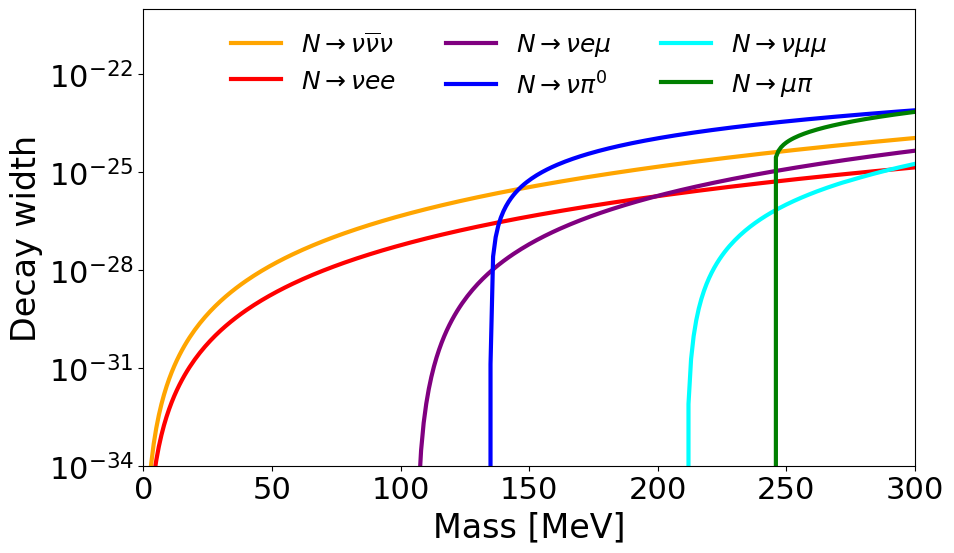

In [10]:
plt.rc('font', size=22)
plt.figure(figsize=(10,6))

Majorana = True
Plot_Genie = False
Plot_MeV = True

if (Plot_MeV): Norm_mass, unit_str = 1e3, "MeV"
else: Norm_mass, unit_str = 1.0, "GeV"

if Majorana==True: 
    N_type = "Majorana"
    Pawel_width = Pawel_new_maj_widths
    Genie_width = Genie_new_maj_widths
if Majorana==False: 
    N_type = "Dirac"
    Pawel_width = Pawel_new_dir_widths
    Genie_width = Genie_new_dir_widths
    
channels = ["width_3nu", "width_e+e-", 'width_nu_e_mu',"width_nu_pi0", "width_mu_mu", "width_mu_pi"] 
colours = {"width_3nu":"orange", "width_e+e-":"red", "width_nu_pi0":"blue", 'width_nu_e_mu':"purple", "width_mu_mu":"cyan",
           "width_mu_pi":"green"}
labels = {"width_3nu":r"$N \rightarrow \nu \overline{\nu} \nu$", "width_e+e-":r"$N \rightarrow \nu ee$",
          "width_nu_pi0":r"$N \rightarrow \nu\pi^{0}$", 'width_nu_e_mu':r"$N \rightarrow \nu e\mu$",
          "width_mu_mu":r"$N \rightarrow \nu\mu\mu$","width_mu_pi":r"$N \rightarrow \mu\pi$"}

for chan in channels:
    plt.plot(Pawel_width["mass"]*Norm_mass, Pawel_width[chan], label=labels[chan], lw=3, color=colours[chan])
# plt.plot(Pawel_width["mass"], Pawel_width["width_total"], label=r"$\Gamma (N \rightarrow any)$", lw=3, color="black", linestyle="dashed")
# for chan in channels:
#     plt.plot(Pawel_new_dir_widths["mass"], Pawel_new_dir_widths[chan], label=labels[chan], lw=3, color=colours[chan], linestyle="dashed")

Genie_width_Dir = Genie_new_dir_widths
if Plot_Genie==True:
    for chan in channels:
        plt.plot(Genie_width["mass"]*Norm_mass, Genie_width[chan], label="Genie "+labels[chan], lw=3, color=colours[chan], linestyle="dashed")
        # plt.plot(Genie_width_Dir["mass"], Genie_width_Dir[chan], label="Dirac "+labels[chan], lw=3, color=colours[chan])
        
plt.ylim(1e-34,1e-20)
plt.xlim(0,0.3*Norm_mass)
plt.ylabel("Decay width", fontsize=24)
plt.xlabel(f"Mass [{unit_str}]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=18, loc="upper center", frameon=False, framealpha=0.8, ncol=3)
plt.tight_layout()

savefig = input("Do you want to save the figure? y/n")

if savefig=="y":
    savename = f"Widths_{N_type}_negwt_fix_relabelled_{unit_str}"
    # savename = f"Widths_BOTH_weinberg_fix_durham_eq"
    plt.savefig("plots/Generator/"+savename+".pdf")
    plt.savefig("plots/Generator/"+savename+".png")

## Plotting Branching ratios

In [ ]:
Pawel_width_maj_plot.keys()

Do you want to save the figure? y/n y


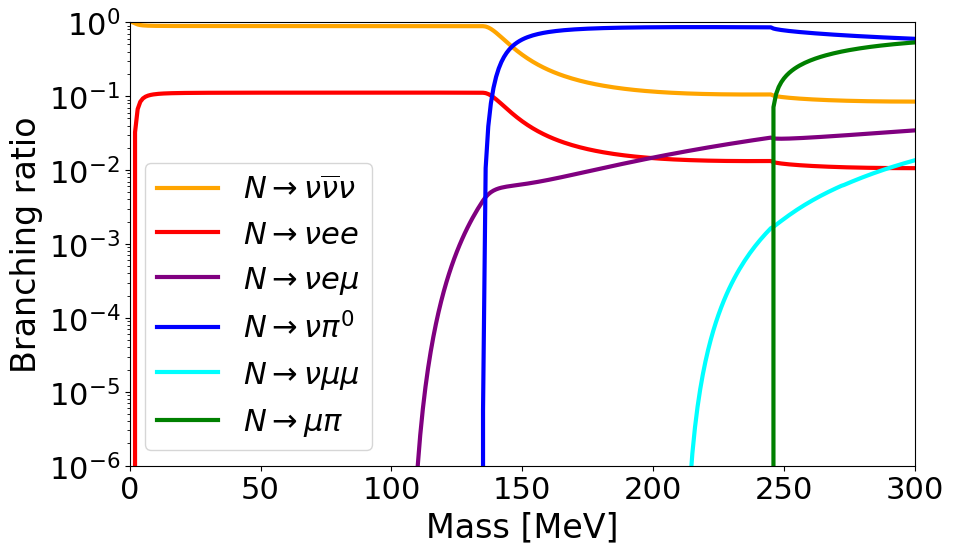

In [13]:
plt.rc('font', size=22)
plt.figure(figsize=(10,6))

Majorana = True
Plot_Genie = False
Plot_MeV = True

if (Plot_MeV): Norm_mass, unit_str = 1e3, "MeV"
else: Norm_mass, unit_str = 1.0, "GeV"

channels_BR = ['BR_3nu', 'BR_e+e-', 'BR_nu_e_mu', 'BR_nu_pi0',"BR_mu_mu", "BR_mu_pi"]
colours = {'BR_3nu':"orange", 'BR_e+e-':"red", 'BR_nu_pi0':"blue", 'BR_nu_e_mu':"purple", "BR_mu_mu":"cyan", "BR_mu_pi":"green"}
labels = {'BR_3nu':r"$N \rightarrow \nu \overline{\nu} \nu$", 'BR_e+e-':r"$N \rightarrow \nu ee$",
          'BR_nu_pi0':r"$N \rightarrow \nu\pi^{0}$", 'BR_nu_e_mu':r"$N \rightarrow \nu e\mu$",
          "BR_mu_mu":r"$N \rightarrow \nu\mu\mu$", "BR_mu_pi":r"$N \rightarrow \mu\pi$"}

Pawel_width_Dir = Pawel_new_dir_widths
for chan in channels_BR:
    plt.plot(Pawel_width["mass"]*Norm_mass, Pawel_width[chan], label=labels[chan], lw=3, color=colours[chan])
    
if Plot_Genie==True:
    for chan in channels_BR:
        plt.plot(Genie_new_dir_nu["mass"]*Norm_mass, Genie_new_dir_nu[chan], label=labels[chan], lw=3, color=colours[chan], linestyle="dashed")

plt.xlim(0,0.3*Norm_mass)
plt.ylim(1e-6, 1.0)
plt.ylabel("Branching ratio", fontsize=24)
plt.xlabel(f"Mass [{unit_str}]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=22, loc="best")
plt.tight_layout()

savefig = input("Do you want to save the figure? y/n")

if savefig=="y":
    savename = f"BRs_negwt_fix_{unit_str}"
    plt.savefig("plots/Generator/"+savename+".pdf")
    plt.savefig("plots/Generator/"+savename+".png")

## Plotting ratios of BRs

In [ ]:
masses = [0.100, 0.150, 0.180, 0.200, 0.22, 0.24, 0.245]
BR_ee_interp = get_interpolated_vals(Pawel_width["mass"], Pawel_width['BR_e+e-'], masses) 
BR_emu_interp = get_interpolated_vals(Pawel_width["mass"], Pawel_width['BR_nu_e_mu'], masses)

ratio_ee_emu = {}
total_BR = {}
frac_ee, frac_emu = {}, {}
for i, HNL_mass in enumerate(masses):
    if BR_emu_interp[i] == 0:
        total_BR[HNL_mass] = BR_ee_interp[i]
        ratio_ee_emu[HNL_mass] = 1.0
        frac_ee[HNL_mass] = 1.0
        frac_emu[HNL_mass] = 0.0
    else:
        total_BR[HNL_mass] = BR_ee_interp[i]+BR_emu_interp[i]
        ratio_ee_emu[HNL_mass] =  BR_ee_interp[i]/BR_emu_interp[i]
        frac_ee[HNL_mass] = BR_ee_interp[i]/(BR_ee_interp[i]+BR_emu_interp[i])
        frac_emu[HNL_mass] = BR_emu_interp[i]/(BR_ee_interp[i]+BR_emu_interp[i])


In [ ]:
print(ratio_ee_emu)
print(frac_ee)
print(frac_emu)

x_list_masses = []
for HNL_mass in frac_ee.keys():
    x_list_masses.append(int(HNL_mass*1000))
print(x_list_masses)

In [ ]:
plt.figure(figsize=(10,6))
x_int_list = range(0, len(frac_emu.keys()))
# plt.bar(x_int_list, frac_ee.values(), label=r"$\nu e^{+}e^{-}$", tick_label=list(frac_ee.keys()))
plt.bar(x_int_list, frac_ee.values(), label=r"$\nu e^{+}e^{-}$", tick_label=x_list_masses)
plt.bar(x_int_list, frac_emu.values(), label=r"$\nu e\mu$", tick_label=x_list_masses, bottom=list(frac_ee.values()))
# plt.bar(x_int_list, frac_all_mus.values(), label=r"$\nu \mu\mu$", tick_label=list(frac_ee.keys()),bottom=list(e_mu_plus_ee.values()))

plt.axhline(1.0,ls="--", color="black")
plt.ylabel("Fraction of BR")
plt.xlabel("HNL mass [MeV]")
plt.xlim(-0.5, len(x_int_list)+2)
plt.legend(fontsize=22, loc="center right")

plt.tight_layout()

savefig = False

Name = "BR_fractions"

if savefig == True:
    plt.savefig("plots/Generator/" + Name + ".png")
    plt.savefig("plots/Generator/" + Name + ".pdf")
    
else: print("Not saving plot")

## Lifetimes

In [ ]:
x_vals = [0.002,0.010,0.020,0.050,0.100,0.150,0.180,0.200,0.220,0.240,0.245]
BR_Genie_interp = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["lifetime"], x_vals)
BR_Pawel_interp = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["lifetime [ns]"], x_vals) 

In [ ]:
print(BR_Genie_interp)
print(BR_Pawel_interp)

4.09480e+12 #Genie
3.83433e+12 #Pawel

In [ ]:
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
# plt.title("HNL Generator Branching Ratios (Dirac)", fontsize=24)
# plt.plot(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["lifetime [ns]"], label = r"Gelato Maj. lifetime", lw=3)
# plt.plot(Genie_new_maj_nu["mass"], Genie_new_maj_nu["lifetime"], label = r"Genie Maj. lifetime", lw=3, linestyle="dashed")
plt.plot(Pawel_new_dir_mu["mass"], Pawel_new_dir_mu["lifetime [ns]"], label = r"Gelato Dir. lifetime", lw=3)
plt.plot(Genie_new_dir_nu["mass"], Genie_new_dir_nu["lifetime"], label = r"Genie Dir. lifetime", lw=3, linestyle="dashed")

# plt.ylim(1e-4,1.0)
plt.xlim(0,0.35)
plt.ylabel("Lifetime [ns]", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=24, loc="upper right")
plt.tight_layout()

savename = "New_Dirac_Lifetimes"
plt.savefig("plots/Generator/"+savename+".pdf")

In [ ]:
x_vals = np.linspace(0.01, 0.35, 40)
BR_Genie_interp = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["BR_e+e-"], x_vals)
BR_Pawel_interp = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR nue+e-"], x_vals)

BR_Genie_interp_3nu = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["BR_3nu"], x_vals)
BR_Pawel_interp_3nu = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR 3nu"], x_vals)
ratio_ee = get_ratio(BR_Pawel_interp,BR_Genie_interp)
ratio_3nu = get_ratio(BR_Pawel_interp_3nu,BR_Genie_interp_3nu)
perc_diff = []
for i in ratio_ee:
    perc_diff = (1-ratio_ee)*100

plt.plot(x_vals,ratio_ee, lw=3, label="ee ratio")
plt.plot(x_vals,ratio_3nu, lw=3, label="3nu ratio", linestyle="dashed")

# plt.ylim(1.0,2.0)
# plt.plot(x_vals,perc_diff, lw=3)
plt.xlabel("Mass [GeV]")
plt.ylabel("Ratio")
plt.legend()
# plt.ylabel("% difference ee channel")

In [ ]:
plt.figure(figsize=(10,6))
x_vals = np.linspace(0.01, 0.35, 40)
Lifetime_Genie_interp = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["lifetime"], x_vals)
Lifetime_Pawel_interp = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["lifetime [ns]"], x_vals)

# BR_Genie_interp_3nu = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["BR_3nu"], x_vals)
# BR_Pawel_interp_3nu = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR 3nu"], x_vals)
ratio_lifetimes = get_ratio(Lifetime_Pawel_interp,Lifetime_Genie_interp)
perc_diff = []
for i in ratio_lifetimes:
    perc_diff = (1-ratio_lifetimes)*100

plt.plot(x_vals,ratio_lifetimes, lw=3, label="lifetime ratio")

plt.xlim(0,0.2)
plt.ylim(0.9,1.1)
# plt.ylim(1.0,2.0)
# plt.plot(x_vals,perc_diff, lw=3)
plt.xlabel("Mass [GeV]")
plt.ylabel("Ratio")
plt.legend()

In [ ]:
plt.figure(figsize=(10,6))
x_vals = np.linspace(0.01, 0.35, 40)
x_vals_pi0 = np.linspace(0.14, 0.35, 40)

nu_Genie_interp = get_interpolated_vals(Genie_new_dir_widths["mass"], Genie_new_dir_widths["width_3nu"], x_vals)
nu_Pawel_interp = get_interpolated_vals(Pawel_new_dir_widths["mass"], Pawel_new_dir_widths["width_3nu"], x_vals)

nu_ee_Genie_interp = get_interpolated_vals(Genie_new_dir_widths["mass"], Genie_new_dir_widths["width_e+e-"], x_vals)
nu_ee_Pawel_interp = get_interpolated_vals(Pawel_new_dir_widths["mass"], Pawel_new_dir_widths["width_e+e-"], x_vals)

nu_emu_Genie_interp = get_interpolated_vals(Genie_new_dir_widths["mass"], Genie_new_dir_widths['width_e_mu'], x_vals)
nu_emu_Pawel_interp = get_interpolated_vals(Pawel_new_dir_widths["mass"], Pawel_new_dir_widths['width_nu_e_mu'], x_vals)

nu_pi0_Genie_interp = get_interpolated_vals(Genie_new_dir_widths["mass"], Genie_new_dir_widths["width_nu_pi0"], x_vals)
nu_pi0_Pawel_interp = get_interpolated_vals(Pawel_new_dir_widths["mass"], Pawel_new_dir_widths["width_nu_pi0"], x_vals)

ratio_3nu = get_ratio(nu_Pawel_interp,nu_Genie_interp)
ratio_ee = get_ratio(nu_ee_Pawel_interp,nu_ee_Genie_interp)
ratio_ee_new = get_ratio(nu_ee_Genie_interp,nu_ee_Pawel_interp)
ratio_emu = get_ratio(nu_emu_Pawel_interp,nu_emu_Genie_interp)
ratio_emu_new = get_ratio(nu_emu_Genie_interp,nu_emu_Pawel_interp)
ratio_nu_pi0 = get_ratio(nu_pi0_Pawel_interp,nu_pi0_Genie_interp)
perc_diff = []
for i in ratio_3nu:
    perc_diff = (1-ratio_3nu)*100

plt.plot(x_vals,ratio_3nu, lw=3, label="width 3nu ratio")
plt.plot(x_vals,ratio_ee_new, lw=3, label="width e+e- ratio")
plt.plot(x_vals,ratio_emu_new, lw=3, label="width emu ratio")
plt.plot(x_vals,ratio_nu_pi0, lw=3, label="width nupi0 ratio")


plt.xlim(0,0.3)
# plt.ylim(0.9,1.1)
# plt.ylim(1.0,2.0)
# plt.plot(x_vals,perc_diff, lw=3)
plt.xlabel("Mass [GeV]")
plt.ylabel("Ratio")
plt.legend()

print(ratio_ee)

## Make sure BRs add up to 1.0

In [ ]:
trimmed_Pawel = Pawel_new_maj_mu.head(200).copy()
trimmed_Genie = Genie_new_maj_nu.head(200).copy()

trimmed_Pawel["sum_BRs"] = trimmed_Pawel["BR nue+e-"]+trimmed_Pawel["BR 3nu"]
trimmed_Genie["sum_BRs"] = trimmed_Genie["BR_e+e-"]+trimmed_Genie["BR_3nu"]

plt.figure(figsize=(8,5))
plt.plot(trimmed_Pawel["sum_BRs"], lw=3, label = "Gelato sum BRs")
plt.plot(trimmed_Genie["sum_BRs"], lw=3, linestyle="dashed", label = "Genie sum BRs")
plt.legend()
# for 

In [ ]:
#Dirac BRs etc.
cols_pawel = ["mass",  "BR e+e-",  "BR nu pi0"]
Pawel_BRs = pd.read_csv("Branching_ratios/brs_dirac_um4.Pawel.csv",names=cols_pawel, sep=" ")

filename = "Branching_ratios/brs_dirac_mu.GENIE.txt"

with open(filename) as f:
    lines = f.readlines()

eplus_eminus_channel_dirac = []
pi0_channel_dirac = []

counter = 0
mass_start_point = 0.001 #GeV
mass_list_dirac = []
for line in lines:
    if ("Channel 1 BR" in line) and ((counter+3) % 4 == 0):
        br_value = float(line.split(" ")[-1])
        eplus_eminus_channel_dirac.append(br_value)
        mass = mass_start_point*len(eplus_eminus_channel_dirac)
        mass_list_dirac.append(mass) 
    if ("Channel 3 BR" in line) and ((counter+2) % 4 == 0):
        br_value = float(line.split(" ")[-1])
        pi0_channel_dirac.append(br_value)

    counter += 1
        # print(br_value)
print(counter)
print(len(eplus_eminus_channel_dirac))
print(len(pi0_channel_dirac))

In [ ]:
# print(type(np.array(eplus_eminus_channel_dirac)))
# mass_for_df = np.array(Pawel_BRs["mass"])
# ee_for_df = np.array(Pawel_BRs["BR e+e-"])
# pi0_for_df = np.array(Pawel_BRs["BR nu pi0"])
# dict_for_dirac = {"mass":mass_for_df, "BR_e+e-":ee_for_df, "BR_nu_pi0":pi0_for_df}
# # dirac_cols = ["mass",  "BR_e+e-",  "BR_nu_pi0"]
# df_dirac = pd.DataFrame(dict_for_dirac)
# df_dirac.to_csv("Branching_ratios/Pawel_Dirac_BRs.csv")
# df_dirac.head()

In [ ]:
colour_ee = "red"
colour_pi0 = "blue"
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
# plt.title("HNL Generator Branching Ratios (Dirac)", fontsize=24)
plt.plot(Pawel_BRs["mass"], Pawel_BRs["BR e+e-"], label = r"$N \rightarrow \nu e^{+}e^{-}$", lw=3, color = colour_ee)
plt.plot(Pawel_BRs["mass"], Pawel_BRs["BR nu pi0"], label = r"$N \rightarrow \nu\pi^{0}$", lw=3, color = colour_pi0)
# plt.plot(mass_list_dirac, eplus_eminus_channel_dirac, label = r"Genie $\nu e^+e^-$", lw=3, color = colour_ee, linestyle="dashed")
# plt.plot(mass_list_dirac, pi0_channel_dirac, label = r"Genie $\nu\pi^0$", lw=3, color = colour_pi0, linestyle="dashed")
plt.ylim(1e-4,1.0)
# plt.xlim(0,0.35)
plt.ylabel("Branching Ratio", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=24, loc="lower right")
plt.tight_layout()

savename = "Dirac_HNL_Pawel_Gen_BRs"
plt.savefig("plots/Generator/"+savename+".pdf")

In [ ]:
# 6000 lines in this file from Pawel 
filename = "../Genie_HNLGen/SCAN.log"

with open(filename) as f:
    lines = f.readlines()

eplus_eminus_channel = []
pi0_channel = []

lifetimes = []

counter = 0
mass_start_point = 0.001 #GeV
mass_list = []
for line in lines:
    if ("Channel 1 BR" in line) and ((counter+8) % 12 == 0):
        br_value = float(line.split(" ")[-1])
        eplus_eminus_channel.append(br_value)
        mass = mass_start_point*len(eplus_eminus_channel)
        mass_list.append(mass) 
    if ("Channel 3 BR" in line) and ((counter+7) % 12 == 0):
        br_value = float(line.split(" ")[-1])
        pi0_channel.append(br_value)
    if ("lifetime" in line) and ((counter+9) % 12 == 0):
        lifetime_val = float(line.split(" ")[-1])
        lifetimes.append(lifetime_val)
    counter += 1
        # print(br_value)


In [ ]:
# mass_for_df = np.array(mass_list)
# ee_for_df = np.array(eplus_eminus_channel)
# pi0_for_df = np.array(pi0_channel)
# dict_for_dirac = {"mass":mass_for_df, "BR_e+e-":ee_for_df, "BR_nu_pi0":pi0_for_df}
# # dirac_cols = ["mass",  "BR_e+e-",  "BR_nu_pi0"]
# df_dirac = pd.DataFrame(dict_for_dirac)
# df_dirac.to_csv("Branching_ratios/Genie_Majorana_BRs.csv")

## Plotting the Branching ratios

In [ ]:
colour_ee = "red"
colour_pi0 = "blue"
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
plt.title("HNL Generator Branching Ratios (Majorana)", fontsize=24)
plt.plot(mass_list, eplus_eminus_channel, label = r"Genie $\nu e^+e^-$", lw=3, color = colour_ee)
plt.plot(mass_list, pi0_channel, label = r"Genie $\nu\pi^0$", lw=3, color = colour_pi0)
plt.plot(Davide_ee['Mass'], Davide_ee['Value'], label = r"Davide $\nu e^+e^-$", lw=3, color = colour_ee, linestyle="dashed")
plt.plot(Davide_pi0['Mass'], Davide_pi0['Value'], label = r"Davide $\nu\pi^0$", lw=3, color = colour_pi0, linestyle="dashed")
plt.ylim(1e-4,1.0)
plt.ylabel("BR", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=20, loc="lower right")
plt.tight_layout()

savename = "Majorana_HNL_Gen_BRs"
plt.savefig("plots/Generator/"+savename+".pdf")

## Make ratio of BRs

In [ ]:
x_vals = np.linspace(0.01, 0.35, 20)
BR_Genie_interp = get_interpolated_vals(mass_list_dirac, eplus_eminus_channel_dirac, x_vals)
BR_Pawel_interp = get_interpolated_vals(Pawel_BRs['mass'], Pawel_BRs["BR e+e-"], x_vals)
ratio = get_ratio(BR_Pawel_interp,BR_Genie_interp)
perc_diff = []
for i in ratio:
    perc_diff = (1-ratio)*100

# plt.plot(x_vals,ratio)
plt.plot(x_vals,perc_diff, lw=3)
plt.xlabel("Mass [GeV]")
plt.ylabel("% difference ee channel")
# plt.xlim(0,0.1)
# plt.ylim(1.8,2.2)

In [ ]:
x_vals = np.linspace(0.01, 0.5, 40)
BR_Genie_interp = get_interpolated_vals(mass_list, eplus_eminus_channel, x_vals)
BR_Davide_interp = get_interpolated_vals(Davide_ee['Mass'], Davide_ee['Value'], x_vals)
ratio = get_ratio(BR_Davide_interp,BR_Genie_interp)

plt.plot(x_vals,ratio)
plt.xlabel("Mass [GeV]")
plt.ylabel("Ratio")
plt.xlim(0,0.1)
plt.ylim(1.8,2.2)

## Lifetime plot

In [ ]:
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
plt.title("HNL Generator Lifetimes", fontsize=24)
plt.plot(mass_list, lifetimes, label = r"Lifetime", lw=3)
# plt.ylim(1e-3,1.0)
plt.ylabel("Lifetime", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=22)
plt.tight_layout()

savename = "Genie_HNL_Gen_lifetime"
plt.savefig("plots/Generator/"+savename+".pdf")